## **GRADIENT DESCENT**

<span style="color: green; background-color: yellow;">*Gradient descent* is first order iterative gradient descent algorithm for finding a local maxima of a diffrentiable function.</span>

The idea is to take repeted steps in the opposite direction of the gradient of the function at the current point because this is the direction of the steepest descent.

<span style="color:red; font-size:40px;">Intuition</span>

Gradient descent in the linear regression is used to minimize the error. We take mean squared error which will give the non liner line where there will be minima and maxima. Thus finding the minmum value from the equation will lead to the best fittting values of coffecient and intercept for the model.

First we take a random value of the coffeicient and intercept of the model and through iterative process we find the best fitting values.

We use the old values to find the newer values. 

Mathematically saying, gradient descent is 
$$
b_{new}=b_{old}-\eta {slope}\\
\text{here, } \eta \text{ is learning rate} 
$$


We need to pick the appropriate vlaue of the learning rate. 

**Mathmatical Formulation**
Given a dataset with $n$ samples $(x_i, y_i)$, the linear regression model predicts $\hat{y}_i = wx_i + b$.

The mean squared error (MSE) is:
$$
J(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2
$$

To minimize $J(w, b)$ using gradient descent, compute the gradients:
$$
\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^n x_i (y_i - (wx_i + b))
$$
$$
\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - (wx_i + b))
$$

Update rules:
$$
w := w - \eta \frac{\partial J}{\partial w}
$$
$$
b := b - \eta \frac{\partial J}{\partial b}
$$
where $\eta$ is the learning rate.

In [29]:
import numpy as np
from sklearn.datasets import make_regression

In [30]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

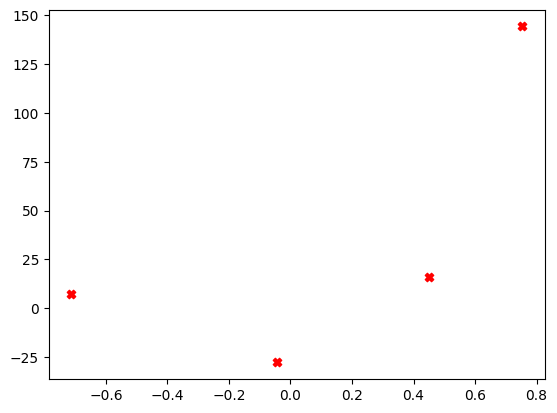

In [32]:
plt.scatter(X,y,color='red',marker='X')

In [33]:
#applying OLS
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)
reg.fit(X,y)

LinearRegression()

In [35]:
reg.intercept_

np.float64(26.15963284313262)

In [36]:
reg.coef_

array([78.35063668])

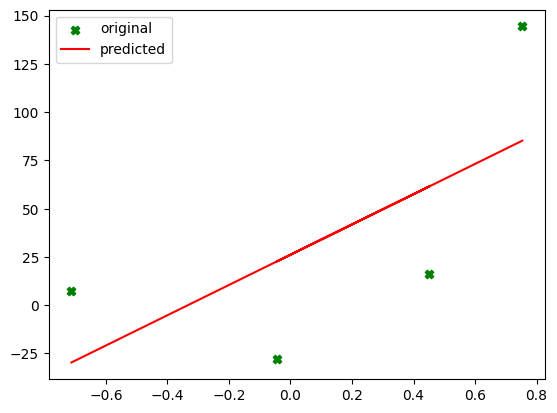

In [37]:
plt.scatter(X,y,marker='X',color='green',label='original')
plt.plot(X,reg.predict(X),color='red',label='predicted')
plt.legend()
plt.show()

In [38]:
#using gradient descent
#lets apply gradient descent with m=78.35
#intercept b=0
m=78.35
b=0
y_pred=((m*X)+b).reshape(4)


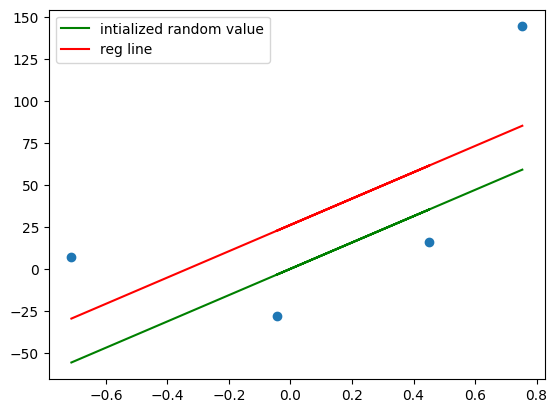

In [39]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='green',label='intialized random value')
plt.plot(X,reg.predict(X),color='red',label='reg line ')
plt.legend()

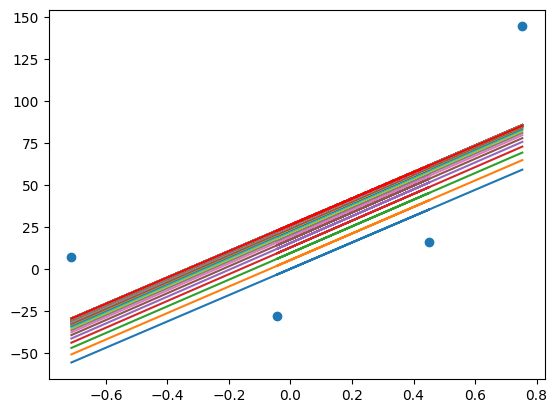

In [40]:
def gradient_descent():
    epochs=100
    learning_rate=0.1
    n=float(len(X))
    m=78.35
    b=0
    for i in range(epochs):
        
        Y_pred=m*X+b
        D_m=(-2/n)*sum(X.flatten()*(y-Y_pred.flatten()))
        D_b=(-2/n)*sum(y.flatten()-Y_pred.flatten())
        m=m-learning_rate*D_m
        b=b-learning_rate*D_b
        plt.plot(X.flatten(),Y_pred.flatten())
    plt.scatter(X,y)
    plt.plot(X.flatten(),reg.predict(X),color='red')
    plt.show()
    return (m,b)
m,b=gradient_descent()
        

In [42]:
print(m,b)
#which gives the nearly the same result as the OLS

78.35864035444365 26.15834586677378


**1. Effects of learning rate**
* If learning rate is low the result will never converge to the correct model and convergence will be slow.
* If it is too high then it will also donot converge and will oscillate higher.

**2. Universality of gradient descent**
* Can be used to minimize loss irrespective of the machine learning algorithm